In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
# Load cycle_df dataset
cycle_df = pd.read_csv("../data/cycle_df_for_main_cycle.csv")
cycle_df.head(5).append(cycle_df.tail(5))

,TotalTime,Phase,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,236,artemis_motor130,60,30.333333,0.694444,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,-0.27778,0.69444,-0.27778,0.69444,0.0
1,237,artemis_motor130,61,31.027778,0.416667,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,-0.27778,0.69444,-0.27778,0.69444,0.0
2,238,artemis_motor130,62,31.444444,0.666667,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,-0.27778,0.69444,-0.27778,0.69444,0.0
3,239,artemis_motor130,63,32.111111,0.555556,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,-0.27778,0.69444,-0.27778,0.69444,0.0
4,240,artemis_motor130,64,32.666667,0.694444,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,-0.27778,0.69444,-0.27778,0.69444,0.0
8075,8881,wltp_class3b,319,0.000000,0.000000,12.94729,0.00000,12.94729,0.00000,12.94729,0.00000,12.94729,0.00000,-1.50000,1.66667,-1.50000,1.66667,2.0
8076,8882,wltp_class3b,320,0.000000,0.000000,12.94009,0.00000,12.94009,0.00000,12.94009,0.00000,12.94009,0.00000,-1.50000,1.66667,-1.50000,1.66667,3.0
8077,8883,wltp_class3b,321,0.000000,0.000000,12.93289,0.00000,12.93289,0.00000,12.93289,0.00000,12.93289,0.00000,-1.50000,1.66667,-1.50000,1.66667,4.0
8078,8884,wltp_class3b,322,0.000000,0.000000,12.92571,0.00000,12.92571,0.00000,12.92571,0.00000,12.92571,0.00000,-1.50000,1.66667,-1.50000,1.66667,5.0
8079,8885,wltp_class3b,323,0.000000,0.000000,12.91853,0.00000,12.91853,0.00000,12.91853,0.00000,12.91853,0.00000,-1.50000,1.66667,-1.50000,1.66667,6.0


In [4]:
cycle_df.Phase.unique()

array(['artemis_motor130', 'artemis_road', 'artemis_urban', 'ftp72',
       'ftp_us06', 'hwfet', 'nycc', 'rts95', 'wltp_class3b'], dtype=object)

In [5]:
phase_mapping = {
    "artemis_motor130" : "10",
    "artemis_road" : "30",
    "artemis_urban" : "50",
    "ftp72" : "70",
    "ftp_us06" : "90",
    "hwfet" : "110",
    "nycc" : "130",
    "rts95" : "150",
    "wltp_class3b" : "170",
}

In [6]:
invertion_phase_mapping = {
    "10" : "artemis_motor130",
    "30" : "artemis_road",
    "50" : "artemis_urban",
    "70" : "ftp72",
    "90" : "ftp_us06",
    "110" : "hwfet",
    "130" : "nycc",
    "150" : "rts95",
    "170" : "wltp_class3b",
}

In [7]:
def convert_phase(df, column_name, phase_dict):
    df[column_name] = df[column_name].replace(phase_dict)
    return df

In [8]:
cycle_df = convert_phase(cycle_df, "Phase", phase_mapping)

In [9]:
cycle_df.head()

,TotalTime,Phase,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,236,10,60,30.333333,0.694444,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,-0.27778,0.69444,-0.27778,0.69444,0.0
1,237,10,61,31.027778,0.416667,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,-0.27778,0.69444,-0.27778,0.69444,0.0
2,238,10,62,31.444444,0.666667,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,-0.27778,0.69444,-0.27778,0.69444,0.0
3,239,10,63,32.111111,0.555556,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,-0.27778,0.69444,-0.27778,0.69444,0.0
4,240,10,64,32.666667,0.694444,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,-0.27778,0.69444,-0.27778,0.69444,0.0


In [10]:
#cycle_df['Phase'] = cycle_df.Phase.replace(phase_mapping)
#cycle_df.head()

In [11]:
#4382
cycle_df.iloc[4382]

TotalTime                     5013
Phase                          110
PhaseTime                      177
Vel                        20.2509
Acc                      -0.134112
5_sec_Vel_mean              18.406
5_sec_Acc_mean             0.11302
10_sec_Vel_mean             18.406
10_sec_Acc_mean            0.11302
30_sec_Vel_mean             18.406
30_sec_Acc_mean            0.11302
60_sec_Vel_mean             18.406
60_sec_Acc_mean            0.11302
30_sec_Acc_min            -1.20701
30_sec_Acc_max             1.43053
60_sec_Acc_min            -1.20701
60_sec_Acc_max             1.43053
60_sec_Vel_iddle_count           0
Name: 4382, dtype: object

In [12]:
cycle_df2 = cycle_df.copy()

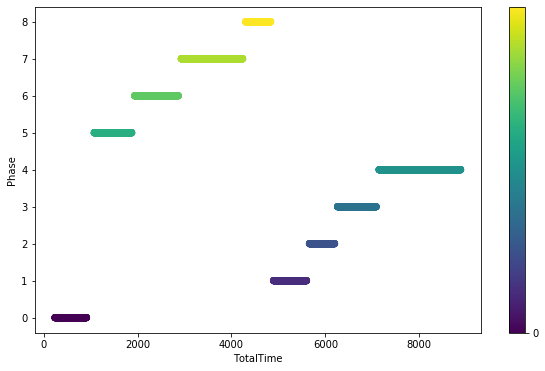

In [13]:
le = preprocessing.LabelEncoder()
le.fit(cycle_df2.Phase.drop_duplicates())
cycle_df2.Phase = le.transform(cycle_df2.Phase)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(10, 6))
plt.scatter(cycle_df2.iloc[:, x], cycle_df2.iloc[:, y],c=cycle_df2.Phase)
plt.colorbar(ticks=[0, 10])
plt.xlabel(cycle_df2.columns[x]);
plt.ylabel(cycle_df2.columns[y]);


In [14]:
!pip install sns

In [15]:
import seaborn as sns

count     8080
unique       9
top        170
freq      1742
Name: Phase, dtype: object


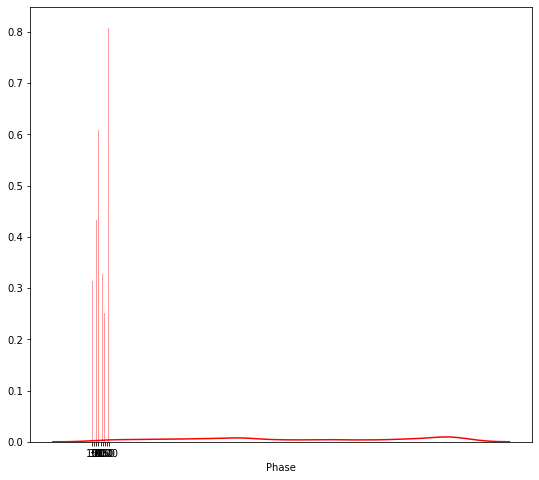

In [16]:
print(cycle_df['Phase'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(cycle_df['Phase'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [17]:
train_df = cycle_df.copy()

In [18]:
train_df = train_df.drop({'Phase', 'TotalTime'}, axis=1)
train_df.head(2)

,PhaseTime,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,60,30.333333,0.694444,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,-0.27778,0.69444,-0.27778,0.69444,0.0
1,61,31.027778,0.416667,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,-0.27778,0.69444,-0.27778,0.69444,0.0


In [19]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [20]:
y = cycle_df.Phase

In [21]:
train_df.shape

(8080, 16)

In [22]:
X = train_df.iloc[:,1:16]

In [23]:
X.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
0,30.333333,0.694444,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,30.68981,0.03194,-0.27778,0.69444,-0.27778,0.69444,0.0
1,31.027778,0.416667,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,30.69536,0.03825,-0.27778,0.69444,-0.27778,0.69444,0.0
2,31.444444,0.666667,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,30.70744,0.04839,-0.27778,0.69444,-0.27778,0.69444,0.0
3,32.111111,0.555556,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,30.72972,0.05644,-0.27778,0.69444,-0.27778,0.69444,0.0
4,32.666667,0.694444,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,30.75998,0.06641,-0.27778,0.69444,-0.27778,0.69444,0.0


In [24]:
X = train_df.iloc[:,1:16]
y = cycle_df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [25]:
X_train.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
4579,25.481280,0.000000,19.73568,0.06795,19.73568,0.06795,19.73568,0.06795,19.73568,0.06795,-1.20701,1.43053,-1.20701,1.43053,0.0
5077,10.997184,-0.134112,2.82928,0.06544,2.82928,0.06544,2.82928,0.06544,2.82928,0.06544,-2.05638,2.50342,-2.05638,2.50342,3.0
862,17.833333,0.277778,13.94365,0.07392,13.94365,0.07392,13.94365,0.07392,13.94365,0.07392,-4.08333,2.36111,-4.08333,2.36111,0.0
5944,9.708333,-1.025000,7.92325,0.01761,7.92325,0.01761,7.92325,0.01761,7.92325,0.01761,-2.71111,2.87778,-2.71111,2.87778,0.0
4188,12.740640,-0.134112,23.53593,0.02420,23.53593,0.02420,23.53593,0.02420,23.53593,0.02420,-3.08458,3.75514,-3.08458,3.75514,8.0


In [26]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [27]:

gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [28]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-11-15 16:01:56.107641
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   16.1s


2020-11-15 16:02:26.588473
0:00:30.480832


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   30.4s finished


In [29]:
print(gsm.best_score_)

0.9929871382180689


In [64]:
#print(gsm.best_score_) = 0.9719479856492577


0.9719479856492577


In [30]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'weights': 'distance'}

In [31]:
print(gsm.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')


In [32]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' '30'
 '70' '70' '130' '130' '150' '50' '170' '70' '110' '170' '50' '30' '110'
 '70' '170' '30' '170' '130' '70' '110' '170' '170' '150' '130' '30' '170'
 '50' '110' '170' '90' '150' '110' '170' '90' '130' '50' '70' '50' '70'
 '170' '110' '170' '150' '30' '130' '30' '150' '110' '170' '90' '50' '10'
 '10' '150' '70' '30' '150' '130' '30' '110' '170' '170' '150' '170' '150'
 '110' '10' '170' '170' '70' '70' '170' '50' '130' '170' '170' '170' '70'
 '30' '70' '70' '90' '70' '150' '30' '10' '50' '170' '170' '90' '50' '90'
 '50' '30' '70' '10' '70' '90' '170' '70' '170' '170' '30' '110' '70' '90'
 '150' '170' '70' '170' '150' '170' '130' '170' '170' '110' '10' '150'
 '150' '50' '150' '70' '50' '170' '30

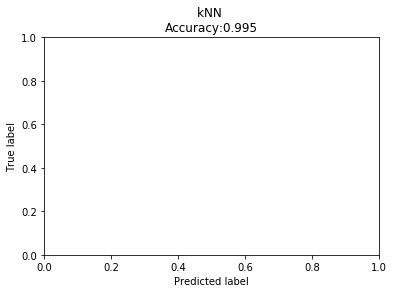

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       0.99      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      0.98      0.98       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808

KNN for k =  3
['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' 

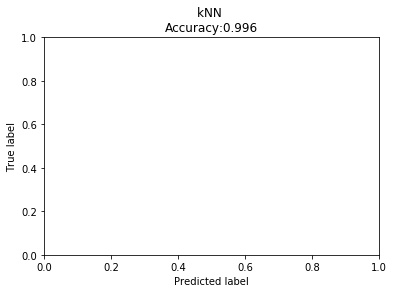

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       0.99      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      0.99      0.99       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808

KNN for k =  5
['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' 

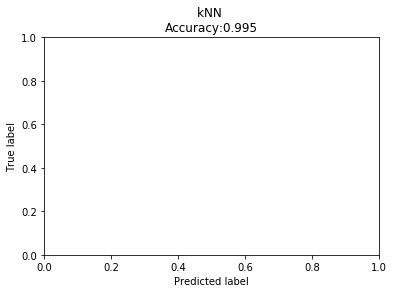

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       0.99      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      0.98      0.98       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808

KNN for k =  7
['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' 

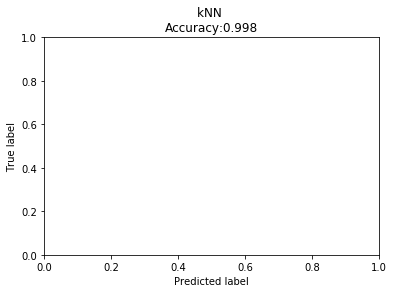

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       0.99      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.99      0.99      0.99       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808

KNN for k =  9
['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' 

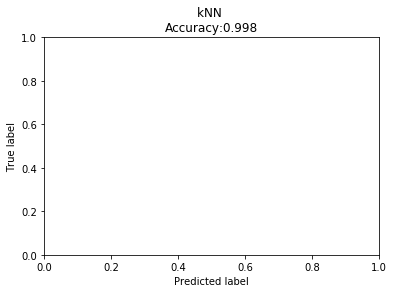

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       1.00      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      1.00      0.99       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808



In [33]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    phase_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(phase_predictor)

    cm = confusion_matrix(y_test, phase_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, phase_predictor))

In [34]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [35]:
# save the model to disk
filename = '../models/KNC_model_for_main_cycles.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

['150' '110' '170' '70' '150' '50' '150' '70' '150' '110' '170' '110'
 '170' '170' '150' '70' '70' '150' '70' '90' '30' '170' '70' '10' '130'
 '30' '30' '50' '170' '90' '110' '10' '110' '70' '70' '50' '170' '170'
 '90' '170' '10' '50' '170' '170' '150' '130' '30' '50' '10' '170' '30'
 '70' '70' '130' '130' '150' '50' '170' '70' '110' '170' '50' '30' '110'
 '70' '170' '30' '170' '130' '70' '110' '170' '170' '150' '130' '30' '170'
 '50' '110' '170' '90' '150' '110' '170' '90' '130' '50' '70' '50' '70'
 '170' '110' '170' '150' '30' '130' '30' '150' '110' '170' '90' '50' '10'
 '10' '150' '70' '30' '150' '130' '30' '110' '170' '170' '150' '170' '150'
 '110' '10' '170' '170' '70' '70' '170' '50' '130' '170' '170' '170' '70'
 '30' '70' '70' '90' '70' '150' '30' '10' '50' '170' '170' '90' '50' '90'
 '50' '30' '70' '10' '70' '90' '170' '70' '170' '170' '30' '110' '70' '90'
 '150' '170' '70' '170' '150' '170' '130' '170' '170' '110' '10' '150'
 '150' '50' '150' '70' '50' '170' '30' '70' '170' '3

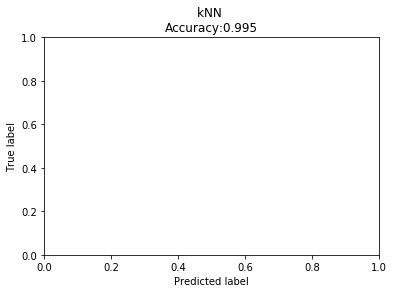

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       0.99      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      0.98      0.98       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808



In [36]:
best_KNC_2 = loaded_model.fit(X_train, y_train)
phase_predictor_2 = best_KNC_2.predict(X_test)
print(phase_predictor_2)

cm = confusion_matrix(y_test, phase_predictor_2)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor_2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, phase_predictor_2))

In [37]:
print(classification_report(y_test, phase_predictor))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        69
         110       1.00      1.00      1.00        64
         130       1.00      1.00      1.00        54
         150       1.00      1.00      1.00        77
         170       1.00      0.99      0.99       191
          30       1.00      1.00      1.00        86
          50       1.00      1.00      1.00        97
          70       0.98      1.00      0.99       121
          90       1.00      1.00      1.00        49

    accuracy                           1.00       808
   macro avg       1.00      1.00      1.00       808
weighted avg       1.00      1.00      1.00       808



In [38]:
y_test.head()

6181    150
4382    110
6410    170
3149     70
6019    150
Name: Phase, dtype: object

In [39]:
phase_predictor

array(['150', '110', '170', '70', '150', '50', '150', '70', '150', '110',
       '170', '110', '170', '170', '150', '70', '70', '150', '70', '90',
       '30', '170', '70', '10', '130', '30', '30', '50', '170', '90',
       '110', '10', '110', '70', '70', '50', '170', '170', '90', '170',
       '10', '50', '170', '170', '150', '130', '30', '50', '10', '170',
       '30', '70', '70', '130', '130', '150', '50', '170', '70', '110',
       '170', '50', '30', '110', '70', '170', '30', '170', '130', '70',
       '110', '170', '170', '150', '130', '30', '170', '50', '110', '170',
       '90', '150', '110', '170', '90', '130', '50', '70', '50', '70',
       '70', '110', '170', '150', '30', '130', '30', '150', '110', '170',
       '90', '50', '10', '10', '150', '70', '30', '150', '130', '30',
       '110', '170', '170', '150', '170', '150', '110', '10', '170',
       '170', '70', '70', '170', '50', '130', '170', '170', '170', '70',
       '30', '70', '70', '90', '70', '150', '30', '10', '50', '

In [40]:
y_test['phase_prediction'] = phase_predictor

In [41]:
y_test.head()

6181    150
4382    110
6410    170
3149     70
6019    150
Name: Phase, dtype: object

In [42]:
X.shape

(8080, 15)

In [43]:
cycle_df.shape, train_df.shape

((8080, 18), (8080, 16))

In [44]:
result = X_test

In [45]:
result

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,0.000000,0.194444,5.23392,0.00128,5.23392,0.00128,5.23392,0.00128,5.23392,0.00128,-1.77778,1.97222,-1.77778,1.97222,10.0
2521,5.900928,1.475232,6.57550,0.04417,6.57550,0.04417,6.57550,0.04417,6.57550,0.04417,-1.47523,1.47523,-1.47523,1.47523,39.0
8016,29.750000,-0.638889,12.78078,0.01675,12.78078,0.01675,12.78078,0.01675,12.78078,0.01675,-1.50000,1.66667,-1.50000,1.66667,0.0
7460,20.805556,0.194444,8.26704,0.01777,8.26704,0.01777,8.26704,0.01777,8.26704,0.01777,-1.50000,1.66667,-1.50000,1.66667,0.0


In [46]:
result.shape

(808, 15)

In [47]:
result['actual_phase'] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
result['predictive_phase'] = phase_predictor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
result.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0,150,150
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0,110,110
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0,170,170
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0,70,70
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0,150,150


In [50]:
result.shape[0], result[result.actual_phase != result.predictive_phase].shape[0]

(808, 2)

In [51]:
100 - (100 * result[result.actual_phase != result.predictive_phase].shape[0] / result.shape[0])

99.75247524752476

In [52]:
result = convert_phase(result, "actual_phase", invertion_phase_mapping)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
result = convert_phase(result, "predictive_phase", invertion_phase_mapping)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
result.head()

,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
6181,30.280556,0.044444,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,11.38855,0.04154,-2.71111,2.87778,-2.71111,2.87778,0.0,rts95,rts95
4382,20.250912,-0.134112,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,18.40599,0.11302,-1.20701,1.43053,-1.20701,1.43053,0.0,hwfet,hwfet
6410,0.000000,0.000000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,4.65194,-0.00000,-1.47222,1.33333,-1.47222,1.33333,33.0,wltp_class3b,wltp_class3b
3149,12.293600,0.000000,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,9.57762,0.01546,-1.47523,1.47523,-1.47523,1.47523,1.0,ftp72,ftp72
6019,16.416667,-0.133333,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,9.55053,0.02867,-2.71111,2.87778,-2.71111,2.87778,0.0,rts95,rts95


In [59]:
result[result.actual_phase != result.predictive_phase].head()


,Vel,Acc,5_sec_Vel_mean,5_sec_Acc_mean,10_sec_Vel_mean,10_sec_Acc_mean,30_sec_Vel_mean,30_sec_Acc_mean,60_sec_Vel_mean,60_sec_Acc_mean,30_sec_Acc_min,30_sec_Acc_max,60_sec_Acc_min,60_sec_Acc_max,60_sec_Vel_iddle_count,actual_phase,predictive_phase
7730,0.333333,-0.333333,10.33894,0.0,10.33894,0.0,10.33894,0.0,10.33894,0.0,-1.5,1.66667,-1.5,1.66667,0.0,wltp_class3b,ftp72
7751,0.000000,0.000000,10.19154,0.0,10.19154,0.0,10.19154,0.0,10.19154,0.0,-1.5,1.66667,-1.5,1.66667,21.0,wltp_class3b,ftp72


In [60]:
#Export dataframe as a csv
result.to_csv("../data/classification_result_for_main_cycles.csv", index=0)